# Deep Learning -- Lab1 -- Backpropagation and Multilayer Neural Networks
#### Professors: C. Ollion (Heuritech), O. Grisel (INRIA)
#### Author: Peter Martigny -- M2 Data Science -- Université Paris Saclay

### Goals: 
- Intro: train a neural network with high level framework `Keras`
- Diving deep: implement a real gradient descent in `Numpy`
- Auto-differentiation: the basics of `TensorFlow`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

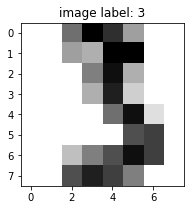

Start Train/Test Split
Train/Test Split is done!
Start Normalization
Normalization is done!


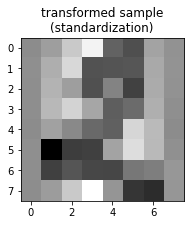

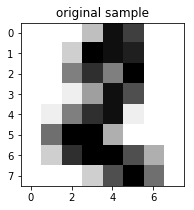

Dimensions of the train set: 
(1527, 64) (1527,)
Dimensions of the test set: 
(270, 64) (270,)


In [1]:
############ Load the dataset and show an example ##########################
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index])
plt.show()


######### Normalization of data + Train/Test split ###############
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

print('Start Train/Test Split')
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)
print('Train/Test Split is done!')

print('Start Normalization')
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Normalization is done!')

######### Example after normalization ###############
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)")
plt.show()

############ Recover the initial example #################
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample")
plt.show()

############ Dimensions used here #################
print('Dimensions of the train set: ')
print(X_train.shape, y_train.shape)
print('Dimensions of the test set: ')
print(X_test.shape, y_test.shape)

# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### Keras Workflow

In [2]:
############## Encode labels into one-hot vectors #############"
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

Using TensorFlow backend.


array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

We can now build an train our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [3]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
import time

############ Define dimensions of layers engaged in the neural network ##########
N = X_train.shape[1]
H = 100
K = 10

######### Build the graph #########
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

############ Assign the graph with an optimizer, a olss function and a metric #######
model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

########### Fit the previously defined model on the train set ##############
start = time.time()
history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
exec_time = time.time() - start

################ Plot the history of the loss on train set ############"
plt.plot(history.history['acc'])
plt.title('{} activation'.format('ReLu'))
plt.show()
print('Training the model took {} seconds!'.format(exec_time))

Epoch 1/15


InternalError: Blas SGEMM launch failed : a.shape=(32, 64), b.shape=(64, 100), m=32, n=100, k=64
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_input_1_0/_9, dense_1_W/read)]]

Caused by op 'MatMul', defined at:
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bcf2dffff4de>", line 14, in <module>
    model.add(Dense(H, input_dim=N))
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\models.py", line 294, in add
    layer.create_input_layer(batch_input_shape, input_dtype)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 398, in create_input_layer
    self(x)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 569, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 632, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 164, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\layers\core.py", line 768, in call
    output = K.dot(x, self.W)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\backend\tensorflow_backend.py", line 807, in dot
    out = tf.matmul(x, y)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1729, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1442, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(32, 64), b.shape=(64, 100), m=32, n=100, k=64
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_input_1_0/_9, dense_1_W/read)]]


#### Influence of the activation function

In [4]:
def train_neural_activation(activation):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation(activation))
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history
#     ################ Plot the history of the loss on train set ############"
#     plt.plot(history.history['acc'])
#     plt.title('{} activation'.format(activation))
#     plt.show()
#     print('Training the model took {} seconds!'.format(exec_time))

In [5]:
activations = ['relu', 'tanh', 'sigmoid', 'linear', 'hard_sigmoid', 'softsign', 'softplus']
histories = {}
for activ in activations:
    histories[activ] = train_neural_activation(activ)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.0197 - acc: 0.7328     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.3026 - acc: 0.9417     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1875 - acc: 0.9640     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1383 - acc: 0.9745     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1086 - acc: 0.9804     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0903 - acc: 0.9856     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0761 - acc: 0.9882     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0655 - acc: 0.9902     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0571 - acc: 0.9928     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0501 - acc: 0.9935     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

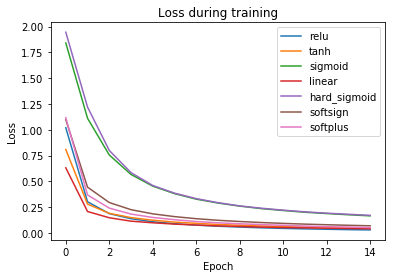

In [6]:
t = np.arange(0, 15)

for activ in activations:
    plt.plot(t, histories[activ].history['loss'], label=activ)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Influence of the number of neurons in the hidden layer

In [7]:
def train_neuron_number(H):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
#     H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu'))
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

In [8]:
layer_size = [50, 100, 200, 300, 400, 500]
histories = {}
for size in layer_size:
    histories[size] = train_neuron_number(size)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.1193 - acc: 0.7132     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.3213 - acc: 0.9306     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1991 - acc: 0.9587     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1435 - acc: 0.9725     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1138 - acc: 0.9764     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0943 - acc: 0.9830     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0800 - acc: 0.9882     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0693 - acc: 0.9915     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0607 - acc: 0.9928     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0539 - acc: 0.9941     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

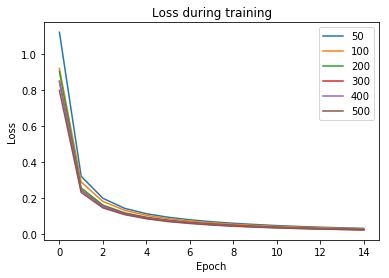

In [9]:
t = np.arange(0, 15)

for size in layer_size:
    plt.plot(t, histories[size].history['loss'], label=size)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Influence of the number of hidden layers

In [10]:
def train_layers(layer_number):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    
    ########### Build the different layers #######"
    for i in range(layer_number):
        if i == 0:
            model.add(Dense(H, input_dim=N))
            model.add(Activation('relu'))
        else:
            model.add(Dense(H, input_dim=H))
            model.add(Activation('relu'))
            
    ####### Build output activation layer #########
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

In [11]:
layer_number = [1, 2, 3, 4, 5]
histories = {}
for number in layer_number:
    histories[number] = train_layers(number)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.9742 - acc: 0.7577     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.2868 - acc: 0.9430     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1764 - acc: 0.9673     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1283 - acc: 0.9758     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1013 - acc: 0.9836     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0834 - acc: 0.9876     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0700 - acc: 0.9882     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0602 - acc: 0.9915     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0526 - acc: 0.9928     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0461 - acc: 0.9954     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

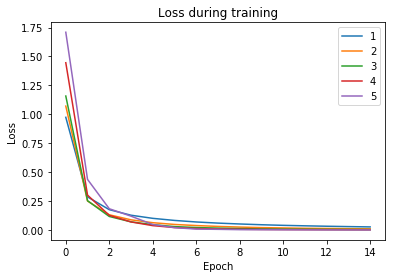

In [12]:
t = np.arange(0, 15)

for number in layer_number:
    plt.plot(t, histories[number].history['loss'], label=number)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Influence of the learning rate

In [13]:
def train_lr(lr):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu')) 
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

In [14]:
learning = [10, 1, 0.1, 0.01, 0.001]
histories = {}
for rate in learning:
    histories[rate] = train_lr(rate)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 13.0162 - acc: 0.1729     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 13.2576 - acc: 0.1775     
Epoch 11/15
1527/1527 [==============================] - 0s

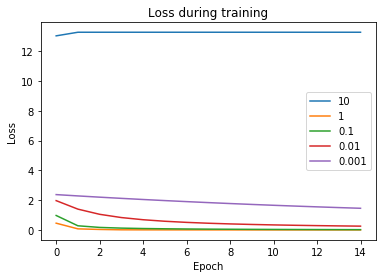

In [15]:
t = np.arange(0, 15)

for rate in learning:
    plt.plot(t, histories[rate].history['loss'], label=rate)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
learning = [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2]
histories = {}
for rate in learning:
    histories[rate] = train_lr(rate)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 2.2000 - acc: 0.2593     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 1.5862 - acc: 0.5370     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 1.1851 - acc: 0.7269     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.9247 - acc: 0.8120     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.7534 - acc: 0.8533     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.6345 - acc: 0.8880     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.5476 - acc: 0.9070     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.4818 - acc: 0.9175     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.4304 - acc: 0.9286     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.3893 - acc: 0.9339     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

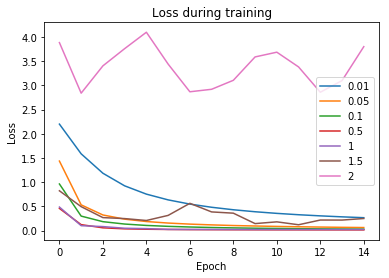

In [17]:
t = np.arange(0, 15)

for rate in learning:
    plt.plot(t, histories[rate].history['loss'], label=rate)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

We observe that the learning phase is better while the learning rate is increasing from 0.01 to 0.5, but then the training loss starts to diverge!

#### Influence of the optimizer (without parameter tuning)

In [18]:
from keras import optimizers
def train_optimizer(optimizer):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu')) 
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.__dict__[optimizer](),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

In [19]:
optims = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
histories = {}
for optim in optims:
    histories[optim] = train_optimizer(optim)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 2.1422 - acc: 0.2554     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 1.5213 - acc: 0.6313     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 1.1378 - acc: 0.7793     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.8965 - acc: 0.8356     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.7365 - acc: 0.8631     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.6241 - acc: 0.8867     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.5417 - acc: 0.9005     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.4789 - acc: 0.9162     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.4295 - acc: 0.9267     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.3900 - acc: 0.9299     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

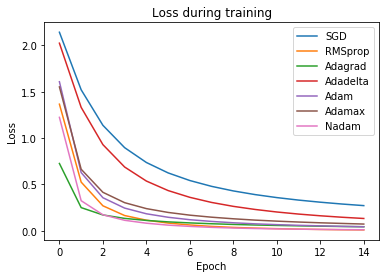

In [20]:
t = np.arange(0, 15)

for optim in optims:
    plt.plot(t, histories[optim].history['loss'], label=optim)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Influence of the Nesterov momentum in SGD

In [21]:
def train_nesterov(moementum):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu')) 
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(nesterov=True, momentum=momentum),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

In [22]:
momentums = [10, 5, 1, 0.5, 0.1, 0.05]
histories = {}
for momentum in momentums:
    histories[momentum] = train_nesterov(momentum)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 5.9426 - acc: 0.0995     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 1.1921e-07 - acc: 0.0989     
Epoch 11/15
1527/1527 [==========

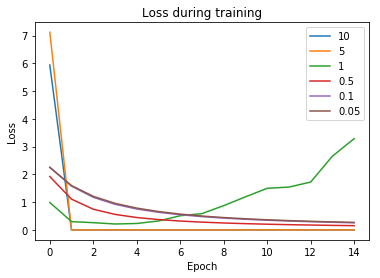

In [23]:
t = np.arange(0, 15)

for momentum in momentums:
    plt.plot(t, histories[momentum].history['loss'], label=momentum)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Forward pass and generalization
- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.3822 - acc: 0.8861     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.0735 - acc: 0.9771     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.0391 - acc: 0.9882     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.0222 - acc: 0.9967     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0115 - acc: 0.9987     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0079 - acc: 1.0000     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0062 - acc: 1.0000     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0051 - acc: 1.0000     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0043 - acc: 1.0000     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0038 - acc: 1.0000     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

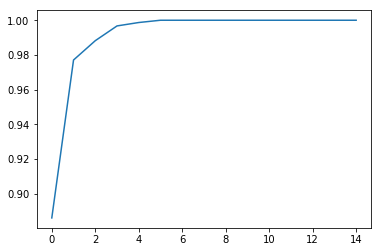

In [24]:
## Change learning rate
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

plt.plot(history.history['acc'])
plt.show()

In [25]:
predicted = model.predict_classes(X_test)
result = sum(predicted == y_test)/len(y_test)
print('\nThe average accuracy of the model on test set is {}'.format(result))

160/270 [================>.............] - ETA: 0s
The average accuracy of the model on test set is 0.9777777777777777


test acc: 0.9778


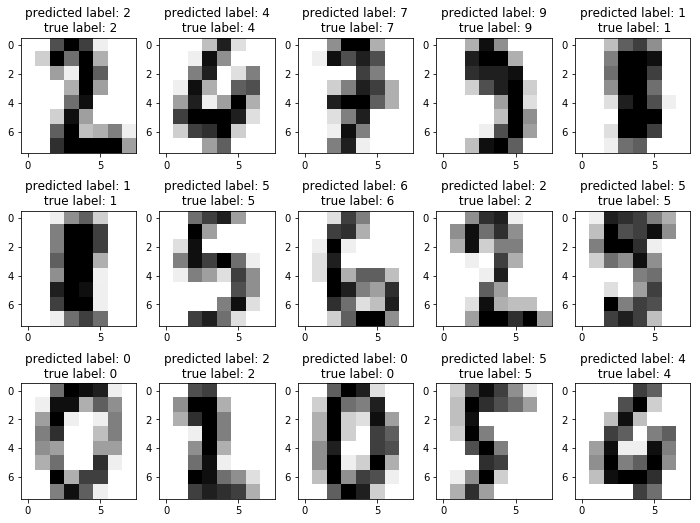

In [26]:
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))

- Compute the conditional probabilities of sample number 42 of the test set with `model.predict_proba(...)`
- Derive the loss (negative log likelihood of that sample) using numpy operations
- Compute the average negative log likelihood of the test set.
- Compare this value to the training loss reported by keras: is the model overfitting or underfitting?

Note: you might need to retrain the model with a larger number of epochs (e.g. 50) to ensure that it has fully converged.+

In [27]:
X_example = model.predict_proba(np.reshape(X_test[42], (-1, 64)))
y_example = to_categorical(y_test)[42]
loss = -np.sum(np.log(X_example) * y_example)

loss

1/1 [==============================] - 0s


2.8133788873674348e-05

In [28]:
loss = 0
for i in range(len(y_test)):
    X_example = model.predict_proba(np.reshape(X_test[i], (-1, 64)))
    y_example = to_categorical(y_test)[i]
    loss += -np.sum(np.log(X_example) * y_example)
result = loss / len(y_test)
print('The average negative log-likelihood on test set is {}'.format(result))

1/1 [==============================] - 0s
The average negative log-likelihood on test set is 0.07483989476493859


Predicted probability distribution for sample #42:
0: 0.00000
1: 0.00000
2: 0.00000
3: 0.00000
4: 0.00000
5: 0.00000
6: 0.00000
7: 0.00000
8: 0.99997
9: 0.00002

Likelihood of true class for sample #42:
0.999972

Average negative loglikelihood of the test set:
0.0748399073637


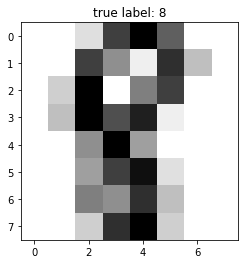

In [29]:
# ############## In a more compact way (vectorial) #############
sample_idx = 42
plt.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("true label: %d" % y_test[sample_idx])

# Compute all probabilities for all samples in the test set at
# once:
probabilities = model.predict_proba(X_test, verbose=0)

print("Predicted probability distribution for sample #42:")
for class_idx, prob in enumerate(probabilities[sample_idx]):
    print("%d: %0.5f" % (class_idx, prob))
print()
    
print("Likelihood of true class for sample #42:")
print(probabilities[sample_idx, y_test[sample_idx]])
print()

print("Average negative loglikelihood of the test set:")
Y_test = to_categorical(y_test)
loglikelihoods = np.sum(np.log(probabilities) * Y_test, axis=1)
print(-np.mean(loglikelihoods))

# Analysis
#
# Depending on the random init, the 2 hidden layers net trained with
# adam seem to converge to a training loss very close to zero when
# given enough epochs (the accuracy on the training set is 100%).
# This model is therefore not underfitting: it has enough capacity
# to perfectly memorise the full training set.
#
# On the test set the negative log likelihood is also close to zero
# but never as much as on the training set (~= 0.07) even after
# increasing the maximum number of epochs. The model is therefore
# overfitting as little.

#### Influence of initialization
Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

Epoch 1/10
1527/1527 [==============================] - 0s - loss: 1.8934     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 1.1307     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 0.6822     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 0.4626     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 0.3435     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 0.2729     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 0.2229     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 0.1897     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 0.1624     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 0.1444     


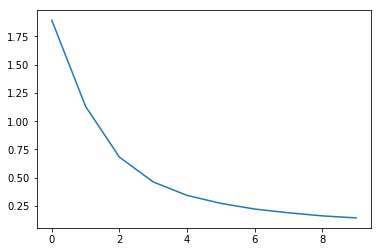

In [30]:
from keras import initializations

def normal_init(shape, scale=1e-1, name=None):
    return initializations.normal(shape, scale=scale, name=name)


model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

plt.plot(history.history['loss'])
plt.show()

In [1]:
histories = {}
scales = [0.001, 1, 10, 0]

for scale in scales:
    def normal_init(shape, name=None):
        return initializations.normal(shape, scale=scale, name=name)
    
    model = Sequential()
    model.add(Dense(H, input_dim=N, init=normal_init))
    model.add(Activation("tanh"))
    model.add(Dense(K, init=normal_init))
    model.add(Activation("tanh"))
    model.add(Dense(K, init=normal_init))
    model.add(Activation("softmax"))

    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy')

    history = model.fit(X_train, Y_train,
                        nb_epoch=15, batch_size=32)    
    histories[scale] = history
    

NameError: name 'Sequential' is not defined

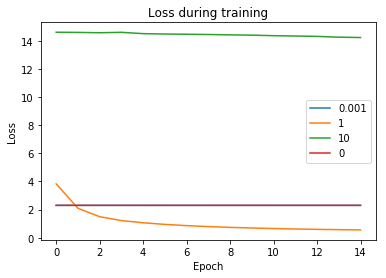

In [33]:
t = np.arange(0, 15)

for scale in scales:
    plt.plot(t, histories[scale].history['loss'], label=scale)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

With the correction: 

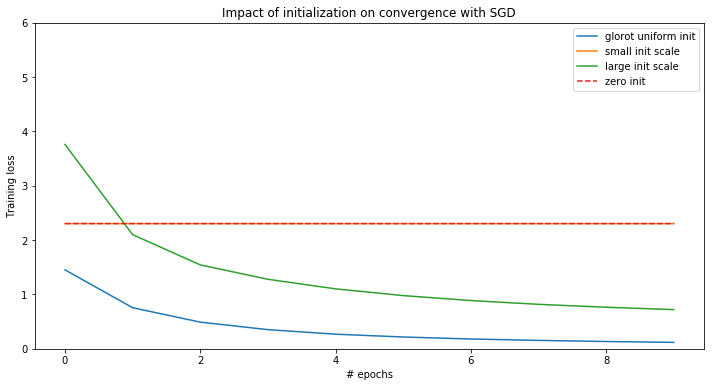

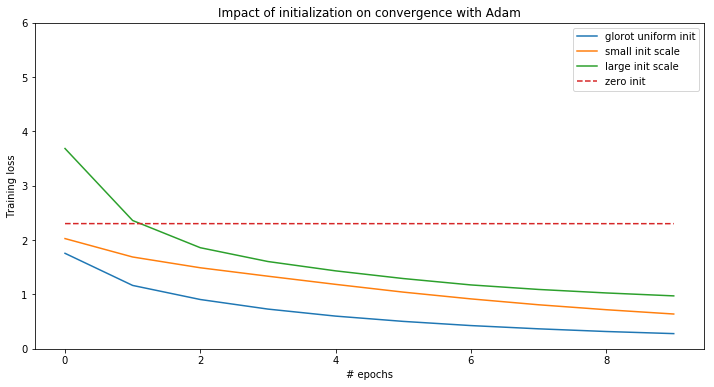

In [34]:
# %load solutions/keras_initializations.py
def large_scale_init(shape, name=None):
    return initializations.normal(shape, scale=1, name=name)


def small_scale_init(shape, name=None):
    return initializations.normal(shape, scale=1e-3, name=name)


optimizer_list = [
    ('SGD', optimizers.SGD(lr=0.1)),
    ('Adam', optimizers.Adam()),
#     ('SGD + Nesterov momentum', optimizers.SGD(
#             lr=0.1, momentum=0.9,nesterov=True)),
]

init_list = [
    ('glorot uniform init', 'glorot_uniform', '-'),
    ('small init scale', small_scale_init, '-'),
    ('large init scale', large_scale_init, '-'),
    ('zero init', 'zero', '--'),
]


for optimizer_name, optimizer in optimizer_list:
    plt.figure(figsize=(12, 6))
    for init_name, init, linestyle in init_list:
        model = Sequential()
        model.add(Dense(H, input_dim=N, init=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, init=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, init=init))
        model.add(Activation("softmax"))
        
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy')

        history = model.fit(X_train, Y_train,
                            nb_epoch=10, batch_size=32, verbose=0)
        plt.plot(history.history['loss'], linestyle=linestyle,
                 label=init_name)

    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.ylim(0, 6)
    plt.legend(loc='best');
    plt.title('Impact of initialization on convergence with %s'
              % optimizer_name)

In [35]:
# %load solutions/keras_initializations_analysis.py
# Analysis
#
# If the network is initialized to zero weights, the activations of the hidden
# layers are always set to zero, whatever the value of the inputs. The gradient
# is always zero for all training samples and no learning can happen with any
# gradient-based optimizer (SGD, Adam...): the loss stays constant.
#
# A network with null weights has null gradients but this not a local minimum
# (nor a local maximum): it is a saddle point at the center of a neighborhood
# with very low gradients. 
#
# Therefore when the scale of a random initializations of the weights is too
# small, SGD has a hard time evading that area of low gradients. Adding
# momentum can help but especially for deep networks it can take many epochs to
# evade the area.
#
# Initializing the weights with large random values will make the output
# distribution (softmax) very peaky: the network is very "confident" of its
# predictions even if they are completely random. This leads to a very high
# initial loss value.
#
# The softmax function does not saturate (bad classification always have a
# non-zero gradient). However the intermediate tanh layers can saturate,
# therefore squashing the gradients and making the network train much slower. 
#
# The Glorot uniform init uses a scale that depends on the dimensions of the
# weigh matrix so has to preserve the average norm of activations and flowing
# gradients so as to make learning possible. Keras provides alternatives that
# can be better in some cases. Please refer to the references in the Keras
# documentation to learn more on the theoretical justifications behind those
# schemes.
#
# Adam tends to be more robust when it comes to bad initialization thanks to
# its per-weight learning rate adjustments but still benefits from a good
# initialization.
#
# More on this in a later class on optimization issues. For now  just remember
# that if you network fails to learn at all (the loss stays at its initial
# value):
#
# - ensure that the weights are properly initialized,
# - inspect the per-layer gradient norms to help identify the bad layer,
# - use Adam instead of SGD as your default go to initializer.


# II) Numpy Implementation

## a) Logistic Regression

In this section we will implement a logistic regression model trainable with SGD using numpy. Here are the objectives:

1/ Implement a simple forward model with no hidden layer (equivalent to a logistic regression):
note: shape, transpose of W with regards to course
$y = softmax(\mathbf{W} \dot x + b)$

2/ build a predict function which returns the most probable class given an input $x$

3/ build an accuracy function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$

4/ build a grad function which computes $\frac{d}{dW} -\log(softmax(W \dot x + b))$ for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

5/ build a train function which uses the grad function output to update $\mathbf{W}$ and $b$


First let's define a helper function to compute the one hot encoding of an integer array for a fixed number of classes (similar to keras' `to_categorical`):

In [36]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [37]:
one_hot(10, [0, 4, 9, 1])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Now let's implement the softmax vector function:

$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$

In [38]:
def softmax(X):
    ## We are cautious that we need to sum only over the rows, not on the whole 2D array!
    exp = np.exp(X)
    return exp / np.sum(exp, axis=-1, keepdims=True)

In [39]:
print("softmax of a single vector:")
print(softmax([10, 2, -3]))
print(np.sum(softmax([10, 2, -3])))
print("\nsotfmax of 2 vectors:")
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X))
print(np.sum(softmax(X), axis=1))

softmax of a single vector:
[  9.99662391e-01   3.35349373e-04   2.25956630e-06]
1.0

sotfmax of 2 vectors:
[[  9.99662391e-01   3.35349373e-04   2.25956630e-06]
 [  2.47262316e-03   9.97527377e-01   1.38536042e-11]]
[ 1.  1.]


Implement a function that given the true one-hot encoded class `Y_true` and some predicted probabilities `Y_pred` returns the negative log likelihood.

In [40]:
def nonzero(x):
    # We add a small constant in case x is null
    return x + 1e-10
def nll(Y_true, Y_pred):
    Y_pred = [nonzero(x) for x in Y_pred]
    aux = -np.log(Y_pred) * Y_true
    return np.sum(aux)
# Make sure that it works for a simple sample at a time
print(nll([1, 0, 0], [.99, 0.01, 0]))

0.0100503357525


Check that the nll of a very confident yet bad prediction is a much higher positive number:

In [41]:
print(nll([1, 0, 0], [0.01, 0.01, .98]))

4.60517017599


Make sure that your implementation can compute the average negative log likelihood of a group of predictions: `Y_pred` and `Y_true` can therefore be past as 2D arrays:

In [42]:
EPSILON = 1e-8

def nll(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)

In [43]:
# Check that the average NLL of the following 3 almost perfect
# predictions is close to 0
Y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

Y_pred = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])

print(nll(Y_true, Y_pred))

0.0033501019175


Let us now study the following linear model trainable by SGD, **one sample at a time**.

In [44]:
class LogisticRegression():

    def __init__(self, input_size, output_size):
        self.W = np.random.uniform(size=(input_size, output_size), high=0.1, low=-0.1)
        self.b = np.random.uniform(size=(output_size), high=0.1, low=-0.1)
        self.output_size = output_size
        
    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return softmax(Z)
    
    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)
    
    def grad_loss(self, x, y_true):
        y_pred = self.forward(x)
        dnll_output =  y_pred - one_hot(self.output_size, y_true)
        grad_W = np.outer(x, dnll_output)
        grad_b = dnll_output
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # Traditional SGD update without momentum
        grads = self.grad_loss(x, y)
        self.W = self.W - learning_rate * grads["W"]
        self.b = self.b - learning_rate * grads["b"]      
        
    def loss(self, x, y):
        return nll(one_hot(self.output_size, y), self.forward(x))

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [45]:
# Build a model and test its forward inference
n_features = X_train.shape[1]
n_classes = Y_train.shape[1]
lr = LogisticRegression(n_features, n_classes)

print("Evaluation of the untrained model:")
train_loss = lr.loss(X_train, y_train)
train_acc = lr.accuracy(X_train, y_train)
test_acc = lr.accuracy(X_train, y_train)

print("train loss: {}, train acc: {}, test acc: {}".format(train_loss, train_acc, test_acc))

Evaluation of the untrained model:
train loss: 2.394756192679792, train acc: 0.07465618860510806, test acc: 0.07465618860510806


1


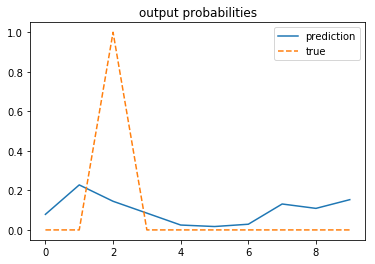

In [46]:
# Test the untrained model on the first example
sample_idx = 0
plt.plot(lr.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(lr.predict(X_train[sample_idx]))

In [47]:
# Training for one epoch
learning_rate = 0.01

for i, (x, y) in enumerate(zip(X_train, y_train)):
    lr.train(x, y, learning_rate)
    if i % 100 == 0:
        train_loss = lr.loss(X_train, y_train)
        train_acc = lr.accuracy(X_train, y_train)
        test_acc = lr.accuracy(X_test, y_test)
        print("Update {}, train loss: {}, train acc: {}, test acc: {}".format(i, train_loss, train_acc, test_acc))

Update 0, train loss: 2.3697516477583167, train acc: 0.10019646365422397, test acc: 0.11481481481481481
Update 100, train loss: 1.3349477354805124, train acc: 0.6967910936476752, test acc: 0.7185185185185186
Update 200, train loss: 0.8778105795509544, train acc: 0.8474132285527177, test acc: 0.8703703703703703
Update 300, train loss: 0.6487203139019637, train acc: 0.8925998690242305, test acc: 0.9
Update 400, train loss: 0.5372035795882143, train acc: 0.9030779305828421, test acc: 0.9111111111111111
Update 500, train loss: 0.4624241199241039, train acc: 0.922724296005239, test acc: 0.9259259259259259
Update 600, train loss: 0.4051728844513043, train acc: 0.9286182056319581, test acc: 0.937037037037037
Update 700, train loss: 0.36590377718464984, train acc: 0.9345121152586772, test acc: 0.9481481481481482
Update 800, train loss: 0.34507993137037674, train acc: 0.9345121152586772, test acc: 0.9518518518518518
Update 900, train loss: 0.3199116602262542, train acc: 0.9404060248853962, test

2


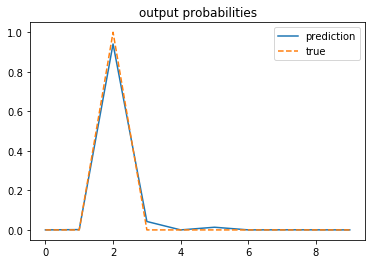

In [48]:
# Evaluate the trained model on the first example
sample_idx = 0
plt.plot(lr.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(lr.predict(X_train[sample_idx]))

After one epoch, the model can fit very well the training data (though probably overfitting...)

## b) Feedforward Multilayer

The objective of this section is to implement the backpropagation algorithm (SGD with the chain rule) on a single layer neural network using the sigmoid activation function.

- Implement the `sigmoid` and its element-wise derivative `dsigmoid` functions:

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

$$
dsigmoid(x) = sigmoid(x) \cdot (1 - sigmoid(x))
$$

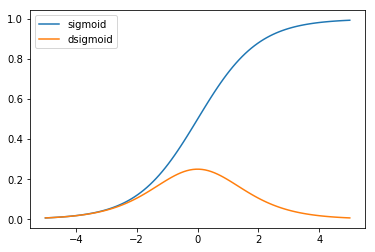

In [49]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def dsigmoid(X):
    sig=sigmoid(X)
    return sig * (1 - sig)


x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.legend(loc='best');

- Implement `forward` and `forward_keep_all` functions for a model with a hidden layer, similar to the first one in Keras:
  - $h = sigmoid(\mathbf{W}^h x + b^h)$
  - $y = softmax(\mathbf{W}^o h + b^o)$

Notes: 
  - try to keep the code as similar as possible as the previous one;
  - `forward_keep_activations` is similar to forward, but also returns hidden activations and pre activations;

- update the grad function to compute all gradients; check that the gradients are well defined;

- implement the `train` and `loss` functions.

Bonus: reimplementing all from scratch without looking at the solution of the `LogisticRegression` is an excellent exercise.

In [50]:
class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o =np.zeros(output_size)
        # END TODO
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        h = sigmoid(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        # END TODO
        return y
    
    def forward_keep_activations(self, X):
        # TODO
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        # TODO
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # TODO
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        # TODO
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        # TODO
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [51]:
n_hidden = 10
model = NeuralNet(n_features, n_hidden, n_classes)

In [52]:
model.loss(X_train, y_train)

2.3026002613586489

In [53]:
model.accuracy(X_train, y_train)

0.10216110019646366

9


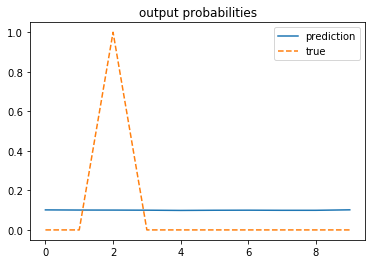

In [54]:
sample_idx = 0
plt.plot(model.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(model.predict(X_train[sample_idx]))

In [55]:
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.3026, train acc: 0.102, test acc: 0.089
Epoch #1, train loss: 0.3689, train acc: 0.906, test acc: 0.859
Epoch #2, train loss: 0.1653, train acc: 0.961, test acc: 0.922
Epoch #3, train loss: 0.1184, train acc: 0.976, test acc: 0.941
Epoch #4, train loss: 0.0884, train acc: 0.986, test acc: 0.948
Epoch #5, train loss: 0.0699, train acc: 0.989, test acc: 0.948
Epoch #6, train loss: 0.0565, train acc: 0.992, test acc: 0.952
Epoch #7, train loss: 0.0468, train acc: 0.995, test acc: 0.952
Epoch #8, train loss: 0.0409, train acc: 0.996, test acc: 0.959
Epoch #9, train loss: 0.0356, train acc: 0.998, test acc: 0.959
Epoch #10, train loss: 0.0316, train acc: 0.998, test acc: 0.963
Epoch #11, train loss: 0.0285, train acc: 0.998, test acc: 0.963
Epoch #12, train loss: 0.0260, train acc: 0.998, test acc: 0.959
Epoch #13, train loss: 0.0239, train acc: 0.998, test acc: 0.959
Epoch #14, train loss: 0.0219, train acc: 0.999, test acc: 0.959
Epoch #15, train loss: 0.0202, t

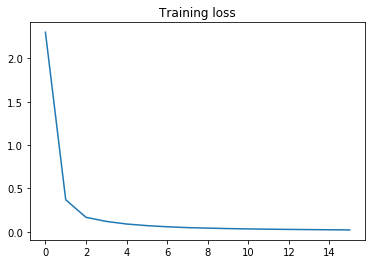

In [56]:
plt.plot(losses)
plt.title("Training loss")
plt.show()

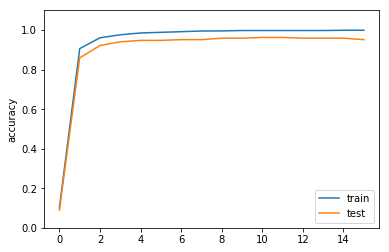

In [57]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.show()

## c) Exercises

### Hyper parameters settings

- Experiment with different hyper parameters:
  - learning rate,
  - size of hidden layer,
  - initialization scheme: test with 0 initialization vs uniform,
  - implement other activation functions,
  - implement the support for a second hidden layer.


### Mini-batches

- Bonus: the current implementations of `train` and `grad_loss` function currently only accept a single sample at a time:
    - implement the support for training with a mini-batch of 32 samples at a time instead of one,
    - experiment with different sizes of batches,
    - monitor the norm of the average gradients on the full training set at the end of each epoch.


### Momentum

- Bonus: Implement momentum

## Hyperparameters

#### Learning rate

Random init: train loss: 2.3027, train acc: 0.100, test acc: 0.100


C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


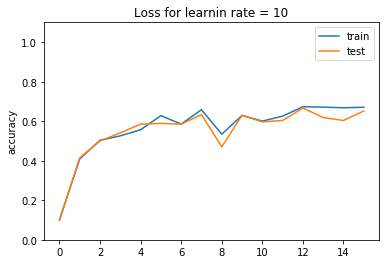

Random init: train loss: 2.3025, train acc: 0.102, test acc: 0.089


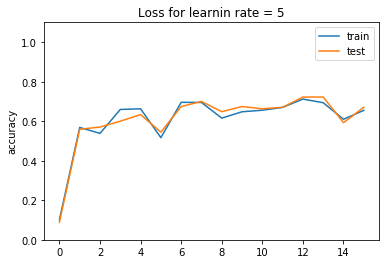

Random init: train loss: 2.3027, train acc: 0.101, test acc: 0.107


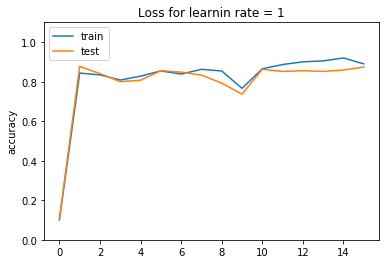

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.100


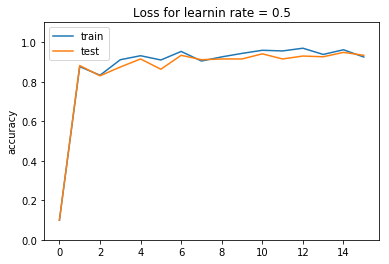

Random init: train loss: 2.3025, train acc: 0.099, test acc: 0.100


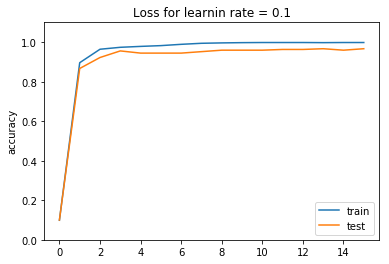

In [58]:
learning_rates = [10, 5, 1, 0.5, 0.1]
for lr in learning_rates:

    model = NeuralNet(n_features, n_hidden, n_classes)
    losses, accuracies, accuracies_test = [], [], []
    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))

    print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
          % (losses[-1], accuracies[-1], accuracies_test[-1]))

    for epoch in range(15):
        for i, (x, y) in enumerate(zip(X_train, y_train)):
            model.train(x, y, lr)

        losses.append(model.loss(X_train, y_train))
        accuracies.append(model.accuracy(X_train, y_train))
        accuracies_test.append(model.accuracy(X_test, y_test))

    plt.plot(accuracies, label='train')
    plt.plot(accuracies_test, label='test')
    plt.ylim(0, 1.1)
    plt.ylabel("accuracy")
    plt.legend(loc='best')
    plt.title('Loss for learnin rate = {}'.format(lr))
    plt.show()

#### Size of the hidden layer

In [59]:
n_hidden

10

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.115


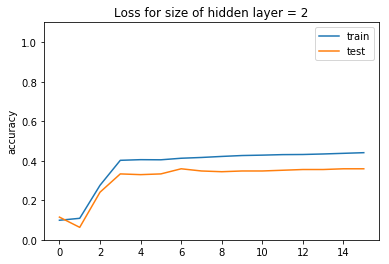

Random init: train loss: 2.3026, train acc: 0.091, test acc: 0.130


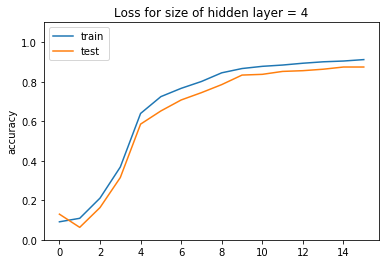

Random init: train loss: 2.3026, train acc: 0.102, test acc: 0.096


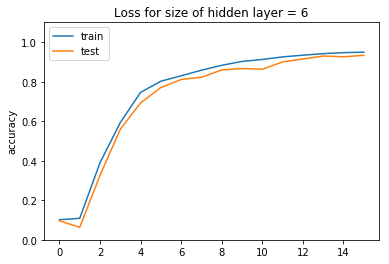

Random init: train loss: 2.3024, train acc: 0.102, test acc: 0.100


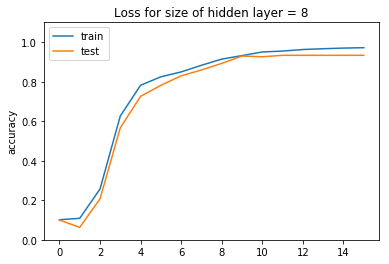

Random init: train loss: 2.3027, train acc: 0.102, test acc: 0.089


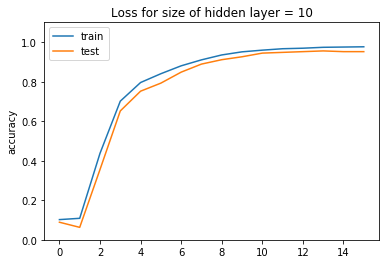

Random init: train loss: 2.3147, train acc: 0.102, test acc: 0.096


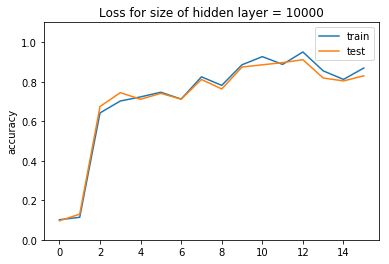

In [60]:
sizes = [2, 4, 6, 8, 10, 10000]
for size in sizes:

    model = NeuralNet(n_features, size, n_classes)
    losses, accuracies, accuracies_test = [], [], []
    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))

    print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
          % (losses[-1], accuracies[-1], accuracies_test[-1]))

    for epoch in range(15):
        for i, (x, y) in enumerate(zip(X_train, y_train)):
            model.train(x, y, 0.01)

        losses.append(model.loss(X_train, y_train))
        accuracies.append(model.accuracy(X_train, y_train))
        accuracies_test.append(model.accuracy(X_test, y_test))

    plt.plot(accuracies, label='train')
    plt.plot(accuracies_test, label='test')
    plt.ylim(0, 1.1)
    plt.ylabel("accuracy")
    plt.legend(loc='best')
    plt.title('Loss for size of hidden layer = {}'.format(size))
    plt.show()

#### Initialization

In [61]:
class NeuralNet_zero():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        a = (input_size, hidden_size)
        self.W_h = np.zeros(a)
        self.b_h = np.zeros(hidden_size)
        a = (hidden_size, output_size)
        self.W_o = np.zeros(a)
        self.b_o =np.zeros(output_size)
        # END TODO
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        h = sigmoid(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        # END TODO
        return y
    
    def forward_keep_activations(self, X):
        # TODO
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        # TODO
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # TODO
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        # TODO
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        # TODO
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

Random init: train loss: 2.3027, train acc: 0.100, test acc: 0.107


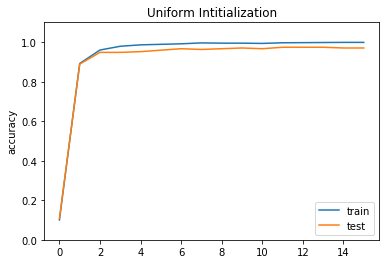

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.100


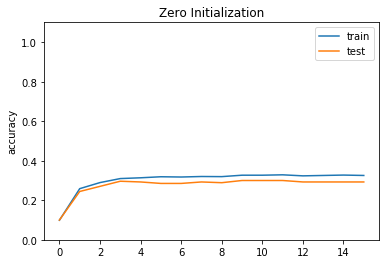

In [62]:
model = NeuralNet(n_features, n_hidden, n_classes)

losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.title('Uniform Intitialization')
plt.show()

model = NeuralNet_zero(n_features, n_hidden, n_classes)

losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.title('Zero Initialization')
plt.show()

#### Other activation function: Tanh

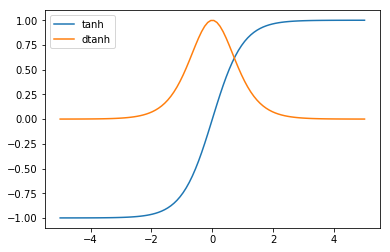

In [68]:
def tanh(x):
    return (np.exp(2*x) - 1) / (1 + np.exp(2*x))


def dtanh(x):
    sig=tanh(x)
    return 1 - (sig**2)


x = np.linspace(-5, 5, 100)
plt.plot(x, tanh(x), label='tanh')
plt.plot(x, dtanh(x), label='dtanh')
plt.legend(loc='best');

In [75]:
class NeuralNet_tanh():
    """MLP with 1 hidden layer with a tanh activation"""

    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o =np.zeros(output_size)
        # END TODO
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        h = tanh(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        # END TODO
        return y
    
    def forward_keep_activations(self, X):
        # TODO
        z_h = np.dot(X, self.W_h) + self.b_h
        h = tanh(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        # TODO
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dtanh(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # TODO
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        # TODO
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        # TODO
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

Random init: train loss: 2.3026, train acc: 0.070, test acc: 0.067


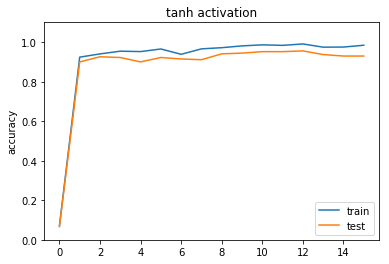

Random init: train loss: 2.3027, train acc: 0.097, test acc: 0.107


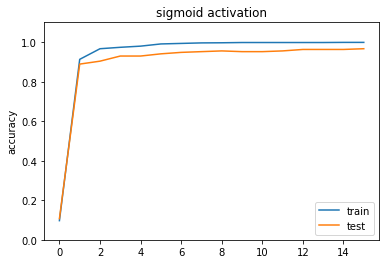

In [76]:
######### Tanh activation #########
model = NeuralNet_tanh(n_features, n_hidden, n_classes)

losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.title('tanh activation')
plt.show()

######### Tanh activation #########
model = NeuralNet(n_features, n_hidden, n_classes)

losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.title('sigmoid activation')
plt.show()

#### Support for a second hidden layer

In [84]:
class NeuralNet_two_layers():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        # TODO
        self.W_h_1 = np.random.uniform(
            size=(input_size, hidden_size_1), high=0.01, low=-0.01)
        self.b_h_1 = np.zeros(hidden_size_1)
        self.W_h_2 = np.random.uniform(
            size=(hidden_size_1, hidden_size_2), high=0.01, low=-0.01)
        self.b_h_2 = np.zeros(hidden_size_2)        
        
        self.W_o = np.random.uniform(
            size=(hidden_size_2, output_size), high=0.01, low=-0.01)
        self.b_o =np.zeros(output_size)
        # END TODO
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        h_1 = sigmoid(np.dot(X, self.W_h_1) + self.b_h_1)
        h_2 = sigmoid(np.dot(h_1, self.W_h_2) + self.b_h_2)
        y = softmax(np.dot(h_2, self.W_o) + self.b_o)
        # END TODO
        return y
    
    def forward_keep_activations(self, X):
        # TODO
        z_h_1 = np.dot(X, self.W_h_1) + self.b_h_1
        h_1 = sigmoid(z_h_1)
        z_h_2 = np.dot(h_1, self.W_h_2) + self.b_h_2
        h_2 = sigmoid(z_h_2)
        z_o = np.dot(h_2, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h_1, h_2, z_h_1, z_h_2
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        # TODO
        y, h_1, h_2, z_h_1, z_h_2 = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h_2, grad_z_o)
        grad_b_o = grad_z_o
        
        grad_h_2 = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h_2 = grad_h_2 * dsigmoid(z_h_2)
        grad_W_h_2 = np.outer(h_1, grad_z_h_2)
        grad_b_h_2 = grad_z_h_2
        
        grad_h_1 = np.dot(grad_z_h_2, np.transpose(self.W_h_2))
        grad_z_h_1 = grad_h_1 * dsigmoid(z_h_1)
        grad_W_h_1 = np.outer(x, grad_z_h_1)
        grad_b_h_1 = grad_z_h_1
        
        grads = {"W_h_1": grad_W_h_1, "b_h_1": grad_b_h_1,
                 "W_h_2": grad_W_h_2, "b_h_2": grad_b_h_2,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # TODO
        grads = self.grad_loss(x, y)
        self.W_h_1 = self.W_h_1 - learning_rate * grads["W_h_1"]
        self.b_h_1 = self.b_h_1 - learning_rate * grads["b_h_1"]
        self.W_h_2 = self.W_h_2 - learning_rate * grads["W_h_2"]
        self.b_h_2 = self.b_h_1 - learning_rate * grads["b_h_2"]   
        
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        # TODO
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        # TODO
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

Random init: train loss: 2.3027, train acc: 0.102, test acc: 0.089


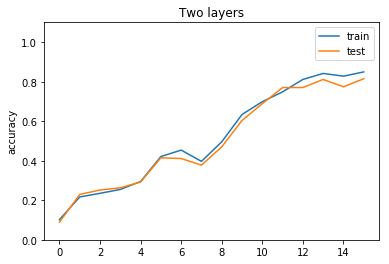

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.100


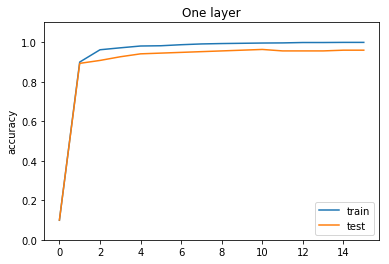

In [86]:
######### Two layers #########
model = NeuralNet_two_layers(n_features, n_hidden, n_hidden, n_classes)

losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.title('Two layers')
plt.show()

######### One layer #########
model = NeuralNet(n_features, n_hidden, n_classes)

losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.title('One layer')
plt.show()